<H1><center>SEAS 8515 Data Engineering - Project 2</center></H1>
<H2><center>Museum Web Scraping</center></H2>
<H3><center>Juan Falck, May 2024</center></H3>

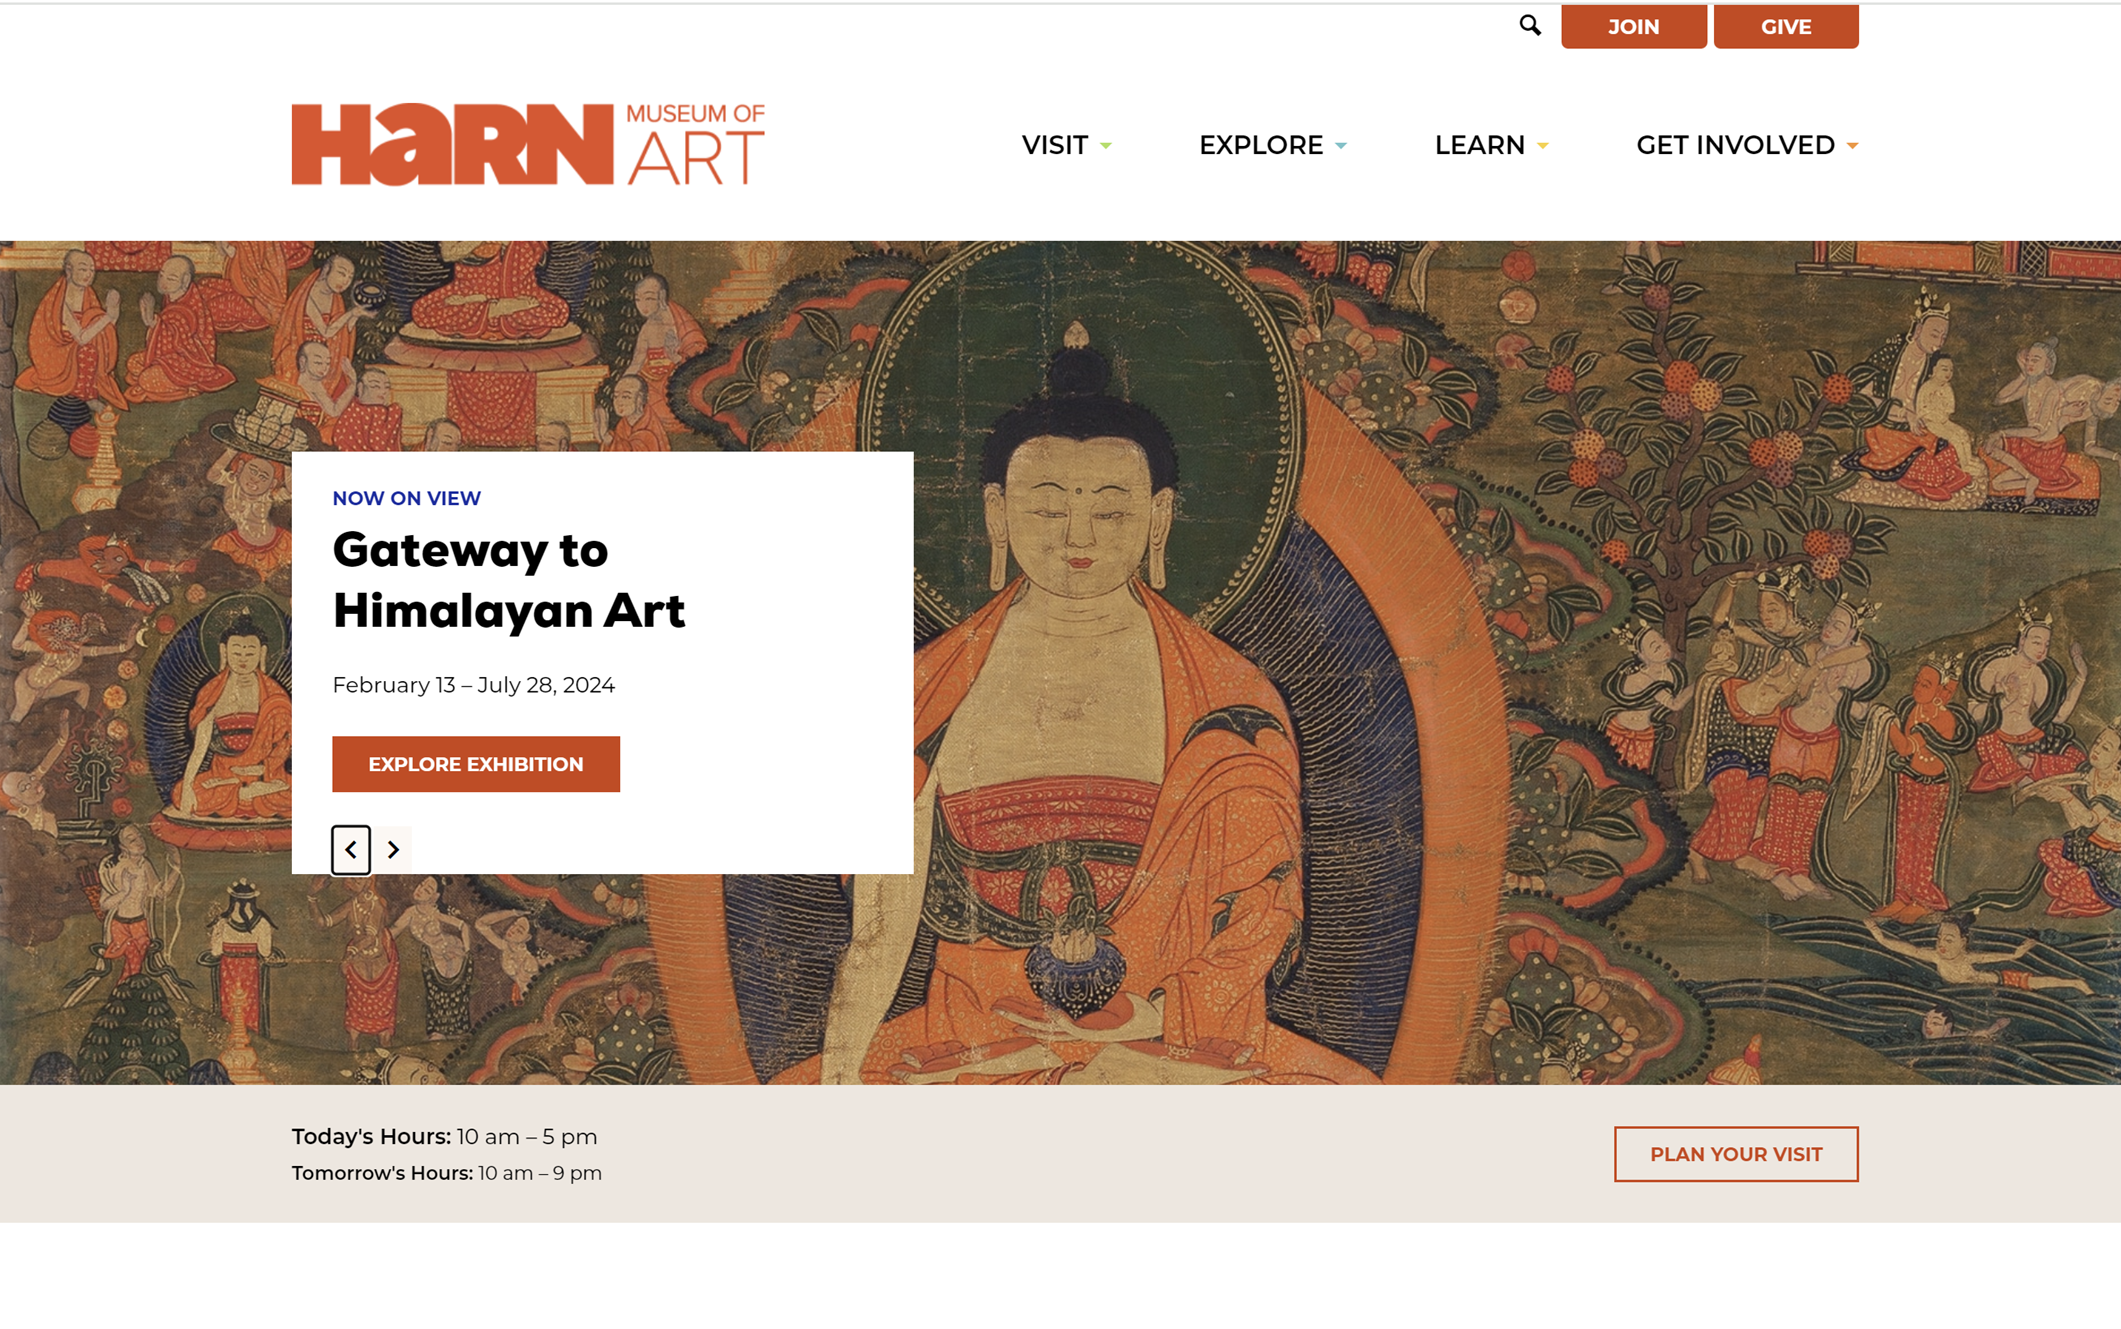

In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def extract_details(url):
    # Fetch the content from URL
    response = requests.get(url)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract Classifications
    classification = soup.find('div', class_='detailField classificationField')
    if classification:
        classification_value = classification.find('span', class_='detailFieldValue').get_text(strip=True)
    else:
        classification_value = "Not found"

    # Extract Collections
    collections = soup.find('div', class_='emuseum-detail-category detailField collectionsField')
    if collections:
        collections_value = ', '.join([li.get_text(strip=True) for li in collections.find_all('li')])
    else:
        collections_value = "Not found"

    return classification_value, collections_value


def fetch_artwork_details(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    artworks_div = soup.find('div', id='listView')
    if not artworks_div:
        return pd.DataFrame()  # Return an empty DataFrame if no div found

    artwork_items = artworks_div.select('.item.list-item.col-lg-4.col-md-6.col-sm-6.col-12')
    if not artwork_items:
        return pd.DataFrame()  # Return an empty DataFrame if no items found

    base_url = 'https://harn.emuseum.com'  # Adjust this to the correct base URL if needed
    artworks = []

    for item in artwork_items:
        texts_wrap = item.find('div', class_='texts-wrap')
        if not texts_wrap:
            continue  # Skip items without the necessary text information

        text_wraps = texts_wrap.find_all('div', class_='text-wrap')
        item_url = texts_wrap.find('a')['href'] if texts_wrap.find('a') else None
        detail1,detail2 = extract_details(base_url + item_url)
        details = {
            'name': text_wraps[0].get_text(strip=True) if len(text_wraps) > 0 else None,
            'artist': text_wraps[1].get_text(strip=True) if len(text_wraps) > 1 else None,
            'date': text_wraps[2].get_text(strip=True) if len(text_wraps) > 2 else None,
            'medium': text_wraps[3].get_text(strip=True) if len(text_wraps) > 3 else None,
            'object_number': text_wraps[4].get_text(strip=True).replace('Object number: ', '') if len(text_wraps) > 4 else None,
            'url': base_url + item_url if item_url else None,  # Concatenate base URL with the relative URL
            'classification' : detail1 if detail1 else None,
            'collection' : detail2 if detail2 else None
        }
        artworks.append(details)

    return pd.DataFrame(artworks)

def fetch_all_pages(base_url, total_pages):
    all_artworks = pd.DataFrame()

    for page in range(1, total_pages + 1):
        url = f"{base_url}?page={page}"
        print(f"Fetching data from: {url}")
        df_page = fetch_artwork_details(url)
        all_artworks = pd.concat([all_artworks, df_page], ignore_index=True)

    return all_artworks


# Base URL without the page parameter
base_url = 'https://harn.emuseum.com/objects/list'
total_pages = 1000

# Fetch all pages and compile the results into a single DataFrame
all_artworks_df = fetch_all_pages(base_url, total_pages)

# Clean up 'date' and 'medium' columns
all_artworks_df['date'] = all_artworks_df['date'].str.replace('Date:', '', regex=False)
all_artworks_df['medium'] = all_artworks_df['medium'].str.replace('Medium:', '', regex=False)
all_artworks_df['object_number'] = all_artworks_df['object_number'].str.replace('Object number:', '', regex=False)


# Save the DataFrame to a CSV file
all_artworks_df.to_csv('artworks_data3.csv', index=False)

print("Data saved to 'artworks_data3.csv'.")



Fetching data from: https://harn.emuseum.com/objects/list?page=1
Fetching data from: https://harn.emuseum.com/objects/list?page=2
Fetching data from: https://harn.emuseum.com/objects/list?page=3
Fetching data from: https://harn.emuseum.com/objects/list?page=4
Fetching data from: https://harn.emuseum.com/objects/list?page=5
Fetching data from: https://harn.emuseum.com/objects/list?page=6
Fetching data from: https://harn.emuseum.com/objects/list?page=7
Fetching data from: https://harn.emuseum.com/objects/list?page=8
Fetching data from: https://harn.emuseum.com/objects/list?page=9
Fetching data from: https://harn.emuseum.com/objects/list?page=10
Fetching data from: https://harn.emuseum.com/objects/list?page=11
Fetching data from: https://harn.emuseum.com/objects/list?page=12
Fetching data from: https://harn.emuseum.com/objects/list?page=13
Fetching data from: https://harn.emuseum.com/objects/list?page=14
Fetching data from: https://harn.emuseum.com/objects/list?page=15
Fetching data from:

Fetching data from: https://harn.emuseum.com/objects/list?page=125
Fetching data from: https://harn.emuseum.com/objects/list?page=126
Fetching data from: https://harn.emuseum.com/objects/list?page=127
Fetching data from: https://harn.emuseum.com/objects/list?page=128
Fetching data from: https://harn.emuseum.com/objects/list?page=129
Fetching data from: https://harn.emuseum.com/objects/list?page=130
Fetching data from: https://harn.emuseum.com/objects/list?page=131
Fetching data from: https://harn.emuseum.com/objects/list?page=132
Fetching data from: https://harn.emuseum.com/objects/list?page=133
Fetching data from: https://harn.emuseum.com/objects/list?page=134
Fetching data from: https://harn.emuseum.com/objects/list?page=135
Fetching data from: https://harn.emuseum.com/objects/list?page=136
Fetching data from: https://harn.emuseum.com/objects/list?page=137
Fetching data from: https://harn.emuseum.com/objects/list?page=138
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=248
Fetching data from: https://harn.emuseum.com/objects/list?page=249
Fetching data from: https://harn.emuseum.com/objects/list?page=250
Fetching data from: https://harn.emuseum.com/objects/list?page=251
Fetching data from: https://harn.emuseum.com/objects/list?page=252
Fetching data from: https://harn.emuseum.com/objects/list?page=253
Fetching data from: https://harn.emuseum.com/objects/list?page=254
Fetching data from: https://harn.emuseum.com/objects/list?page=255
Fetching data from: https://harn.emuseum.com/objects/list?page=256
Fetching data from: https://harn.emuseum.com/objects/list?page=257
Fetching data from: https://harn.emuseum.com/objects/list?page=258
Fetching data from: https://harn.emuseum.com/objects/list?page=259
Fetching data from: https://harn.emuseum.com/objects/list?page=260
Fetching data from: https://harn.emuseum.com/objects/list?page=261
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=371
Fetching data from: https://harn.emuseum.com/objects/list?page=372
Fetching data from: https://harn.emuseum.com/objects/list?page=373
Fetching data from: https://harn.emuseum.com/objects/list?page=374
Fetching data from: https://harn.emuseum.com/objects/list?page=375
Fetching data from: https://harn.emuseum.com/objects/list?page=376
Fetching data from: https://harn.emuseum.com/objects/list?page=377
Fetching data from: https://harn.emuseum.com/objects/list?page=378
Fetching data from: https://harn.emuseum.com/objects/list?page=379
Fetching data from: https://harn.emuseum.com/objects/list?page=380
Fetching data from: https://harn.emuseum.com/objects/list?page=381
Fetching data from: https://harn.emuseum.com/objects/list?page=382
Fetching data from: https://harn.emuseum.com/objects/list?page=383
Fetching data from: https://harn.emuseum.com/objects/list?page=384
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=494
Fetching data from: https://harn.emuseum.com/objects/list?page=495
Fetching data from: https://harn.emuseum.com/objects/list?page=496
Fetching data from: https://harn.emuseum.com/objects/list?page=497
Fetching data from: https://harn.emuseum.com/objects/list?page=498
Fetching data from: https://harn.emuseum.com/objects/list?page=499
Fetching data from: https://harn.emuseum.com/objects/list?page=500
Fetching data from: https://harn.emuseum.com/objects/list?page=501
Fetching data from: https://harn.emuseum.com/objects/list?page=502
Fetching data from: https://harn.emuseum.com/objects/list?page=503
Fetching data from: https://harn.emuseum.com/objects/list?page=504
Fetching data from: https://harn.emuseum.com/objects/list?page=505
Fetching data from: https://harn.emuseum.com/objects/list?page=506
Fetching data from: https://harn.emuseum.com/objects/list?page=507
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=617
Fetching data from: https://harn.emuseum.com/objects/list?page=618
Fetching data from: https://harn.emuseum.com/objects/list?page=619
Fetching data from: https://harn.emuseum.com/objects/list?page=620
Fetching data from: https://harn.emuseum.com/objects/list?page=621
Fetching data from: https://harn.emuseum.com/objects/list?page=622
Fetching data from: https://harn.emuseum.com/objects/list?page=623
Fetching data from: https://harn.emuseum.com/objects/list?page=624
Fetching data from: https://harn.emuseum.com/objects/list?page=625
Fetching data from: https://harn.emuseum.com/objects/list?page=626
Fetching data from: https://harn.emuseum.com/objects/list?page=627
Fetching data from: https://harn.emuseum.com/objects/list?page=628
Fetching data from: https://harn.emuseum.com/objects/list?page=629
Fetching data from: https://harn.emuseum.com/objects/list?page=630
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=740
Fetching data from: https://harn.emuseum.com/objects/list?page=741
Fetching data from: https://harn.emuseum.com/objects/list?page=742
Fetching data from: https://harn.emuseum.com/objects/list?page=743
Fetching data from: https://harn.emuseum.com/objects/list?page=744
Fetching data from: https://harn.emuseum.com/objects/list?page=745
Fetching data from: https://harn.emuseum.com/objects/list?page=746
Fetching data from: https://harn.emuseum.com/objects/list?page=747
Fetching data from: https://harn.emuseum.com/objects/list?page=748
Fetching data from: https://harn.emuseum.com/objects/list?page=749
Fetching data from: https://harn.emuseum.com/objects/list?page=750
Fetching data from: https://harn.emuseum.com/objects/list?page=751
Fetching data from: https://harn.emuseum.com/objects/list?page=752
Fetching data from: https://harn.emuseum.com/objects/list?page=753
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=863
Fetching data from: https://harn.emuseum.com/objects/list?page=864
Fetching data from: https://harn.emuseum.com/objects/list?page=865
Fetching data from: https://harn.emuseum.com/objects/list?page=866
Fetching data from: https://harn.emuseum.com/objects/list?page=867
Fetching data from: https://harn.emuseum.com/objects/list?page=868
Fetching data from: https://harn.emuseum.com/objects/list?page=869
Fetching data from: https://harn.emuseum.com/objects/list?page=870
Fetching data from: https://harn.emuseum.com/objects/list?page=871
Fetching data from: https://harn.emuseum.com/objects/list?page=872
Fetching data from: https://harn.emuseum.com/objects/list?page=873
Fetching data from: https://harn.emuseum.com/objects/list?page=874
Fetching data from: https://harn.emuseum.com/objects/list?page=875
Fetching data from: https://harn.emuseum.com/objects/list?page=876
Fetching data from: https://harn.emuseum.com/objects/list?page

Fetching data from: https://harn.emuseum.com/objects/list?page=986
Fetching data from: https://harn.emuseum.com/objects/list?page=987
Fetching data from: https://harn.emuseum.com/objects/list?page=988
Fetching data from: https://harn.emuseum.com/objects/list?page=989
Fetching data from: https://harn.emuseum.com/objects/list?page=990
Fetching data from: https://harn.emuseum.com/objects/list?page=991
Fetching data from: https://harn.emuseum.com/objects/list?page=992
Fetching data from: https://harn.emuseum.com/objects/list?page=993
Fetching data from: https://harn.emuseum.com/objects/list?page=994
Fetching data from: https://harn.emuseum.com/objects/list?page=995
Fetching data from: https://harn.emuseum.com/objects/list?page=996
Fetching data from: https://harn.emuseum.com/objects/list?page=997
Fetching data from: https://harn.emuseum.com/objects/list?page=998
Fetching data from: https://harn.emuseum.com/objects/list?page=999
Fetching data from: https://harn.emuseum.com/objects/list?page

In [3]:
import pandas as pd

all_artworks_df = pd.read_csv('artworks_data2.csv')
all_artworks_df

name                  artist  \
0      1.  Santa Maria Chiquimula – Totonicapán           Carlos Mérida   
1                                            #2              Jim McLean   
2                     2 Acanthococos Hisslertii  Joao Barbosa Rodrigues   
3                                2 Nigella Nana        Jane Webb Loudon   
4                         2. Regidores – Sololá           Carlos Mérida   
...                                         ...                     ...   
10263               Zulu Beer pot Lid (imbenge)             Zulu Artist   
10264               Zulu Beer pot Lid (imbenge)             Zulu Artist   
10265               Zulu Beer pot Lid (imbenge)             Zulu Artist   
10266               Zulu Beer pot Lid (imbenge)             Zulu Artist   
10267                   Zulu Beer Pot (ukhamba)       Nesta Mathom Nala   

        date                                  medium object_number  \
0       1951                              Lithograph      2020.8.1   
1       1971                         Color serigraph      PR-75-41   
2       1903                            Ink on paper    2014.29.36   
3       1840  Lithograph, hand colored, ink on paper      2012.1.2   
4       1951                              Lithograph      2020.8.2   
...      ...                                     ...           ...   
10263  1960s     Seed beads, glass beads, dyed fiber     2010.90.2   
10264  1960s          Colored seed beads, dyed fiber     2010.90.3   
10265  1960s                  Seed beads, dyed fiber     2010.90.4   
10266  1960s               Colored seed beads, fiber     2010.90.6   
10267   2004                      Clay, bisque fired       2020.26   

                                                     url  \
0      https://harn.emuseum.com/objects/23296/1--sant...   
1      https://harn.emuseum.com/objects/8583/2?ctx=3c...   
2      https://harn.emuseum.com/objects/15287/2-acant...   
3      https://harn.emuseum.com/objects/15136/2-nigel...   
4      https://harn.emuseum.com/objects/23297/2-regid...   
...                                                  ...   
10263  https://harn.emuseum.com/objects/14891/zulu-be...   
10264  https://harn.emuseum.com/objects/14892/zulu-be...   
10265  https://harn.emuseum.com/objects/14893/zulu-be...   
10266  https://harn.emuseum.com/objects/14895/zulu-be...   
10267  https://harn.emuseum.com/objects/24554/zulu-be...   

                  classification                       collection  
0                         Prints                           MODERN  
1                         Prints                     CONTEMPORARY  
2                         Prints  PRINTS AND DRAWINGS BEFORE 1850  
3                         Prints  PRINTS AND DRAWINGS BEFORE 1850  
4                         Prints                           MODERN  
...                          ...                              ...  
10263  Furnishings and Equipment                          AFRICAN  
10264  Furnishings and Equipment                          AFRICAN  
10265  Furnishings and Equipment                          AFRICAN  
10266  Furnishings and Equipment                          AFRICAN  
10267                   Ceramics                          AFRICAN  

[10268 rows x 8 columns]

In [11]:
# Count occurrences of each artist and get the top 20
top_artists = all_artworks_df['artist'].value_counts()

top_artists.head(20)


artist
China                               549
Unknown Japanese Artist             342
Unknown Korean Artist 작자미상 作者未詳,    208
Kenneth A. Kerslake                 207
Thai                                177
Michael A. Smith                    165
Jerry Uelsmann                      159
Andy Warhol                         148
Utagawa (Ando) Hiroshige            138
Unknown                             125
Vietnamese                          122
Anne Noggle                         117
Michael Kenna                       117
Indian                              114
Hiram Williams                      108
Marc Chagall                        107
Zulu Artist                         102
American                             98
Pierre-Joseph Redouté                91
Yoruba Artist                        89
Name: count, dtype: int64

In [12]:
# Count occurrences of each medium and sort them from highest to lowest
medium_counts = all_artworks_df['medium'].value_counts().sort_values(ascending=False)

medium_counts.head(20)


medium
Gelatin silver print                                         1354
Ink on paper                                                  395
Lithograph                                                    350
Oil on canvas                                                 248
Porcelain                                                     189
Stoneware                                                     180
Ink and color on paper                                        164
Wood                                                          146
Stoneware with glaze                                          120
Etching                                                       118
Jade                                                          106
Ink and color on paper, with gold-colored borders (cards)     100
Bronze                                                         94
Oil on board                                                   88
Print                                                          86
Int

In [13]:
# Count occurrences of each classification and sort them from highest to lowest
classification_counts = all_artworks_df['classification'].value_counts().sort_values(ascending=False)

classification_counts.head(20)


classification
Prints                       2486
Photographs                  2461
Ceramics                     1330
Paintings                    1325
Sculpture                     817
Drawings                      407
Costume                       394
Furnishings and Equipment     321
Textiles                      176
Glassware                     138
Metalwork                     124
Coins                          83
Books                          44
Basketry                       41
Musical instruments            36
Collages                       24
Manuscripts                    16
Lacquerware                    15
Enamelware                     11
Architectural Elements          7
Name: count, dtype: int64

In [14]:
# Count occurrences of each collection and sort them from highest to lowest
collection_counts = all_artworks_df['collection'].value_counts().sort_values(ascending=False)

collection_counts.head(20)


collection
ASIAN                              2784
PHOTOGRAPHY                        2147
MODERN                             1649
CONTEMPORARY                       1376
AFRICAN                            1022
PRINTS AND DRAWINGS BEFORE 1850     540
ANCIENT AMERICAN                    436
Not found                           231
OCEANIC                              71
CONTEMPORARY, PHOTOGRAPHY            12
Name: count, dtype: int64

In [8]:
# Count occurrences of each date and sort them from highest to lowest
date_counts = all_artworks_df['date'].value_counts().sort_values(ascending=False)

date_counts.head(50)


date
n.d.                          923
20th Century                  334
20th century                  222
1956                          125
undated                       109
c. 1840                       107
1986                           93
1983                           92
1970                           84
1985                           83
1975                           83
1936-1943                      81
1984                           81
Early 20th century             79
Le-Mac Dynasty (1428-1682)     75
1979                           72
1980                           72
19th Century                   72
Ming Dynasty (1368-1644)       70
1982                           69
1880                           69
2006                           67
1978                           66
1972                           64
1991                           62
1969                           62
1992                           61
1977                           61
1954                           59
2003     